In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
test_data = pd.read_csv('Data_Set/titanic/test.csv')
train_data = pd.read_csv('Data_Set/titanic/train.csv')
train_data.head() # 데이터의 앞부분만 추려서 확인함 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#기초 통계 확인
#데이터의 양, 평균, 표준편차, 최대값, 최소값, 각 4분위수
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#데이터가 부족한 부분이 있으면 차후 채워야한다
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
#각 칼럼별 살아남은 사람의 비율을 확인
def pie_chart(feature):
    feature_value = train_data[feature].value_counts(sort = False)
    feature_size = feature_value.size
    feature_index = feature_value.index
    survived = train_data[train_data['Survived'] == 1][feature].value_counts() #살아남은 사람의 수
    dead = train_data[train_data['Survived'] == 0][feature].value_counts() #죽은 사람의 수
    
    plt.plot(aspect = 'auto')
    plt.pie(feature_value, labels= feature_index, autopct='%1.1f%%')
    plt.title(feature + ' percentage')
    plt.show()
    
    for index, value in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, index + 1, aspect = 'equal')
        plt.pie([survived[value], dead[value]], labels = ['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(value) + '\'s Survivied')
    
    plt.show()

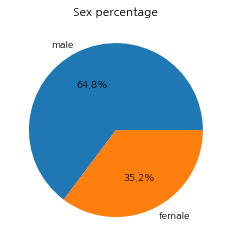

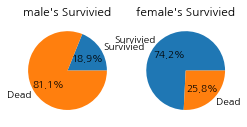

In [21]:
pie_chart('Sex') #어떤 성별인 사람이 많이 살아남았는가

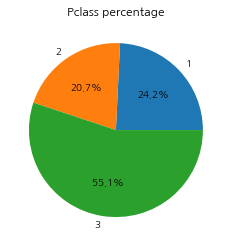

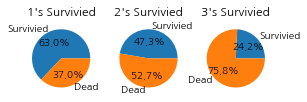

In [22]:
pie_chart('Pclass') #객실 등급

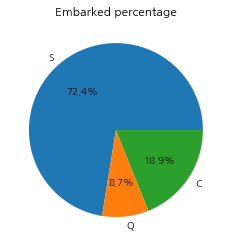

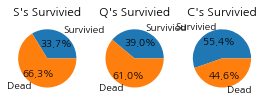

In [23]:
pie_chart('Embarked')

In [27]:
def bar_chart(feature):
    survived = train_data[train_data['Survived'] == 1][feature].value_counts() #살아남은 사람의 수
    dead = train_data[train_data['Survived'] == 0][feature].value_counts() #죽은 사람의 수
    
    temp_df = pd.DataFrame([survived, dead])
    temp_df.index = ['survivied', 'dead']
    temp_df.plot(kind = 'bar', stacked = True, figsize = (20,10))

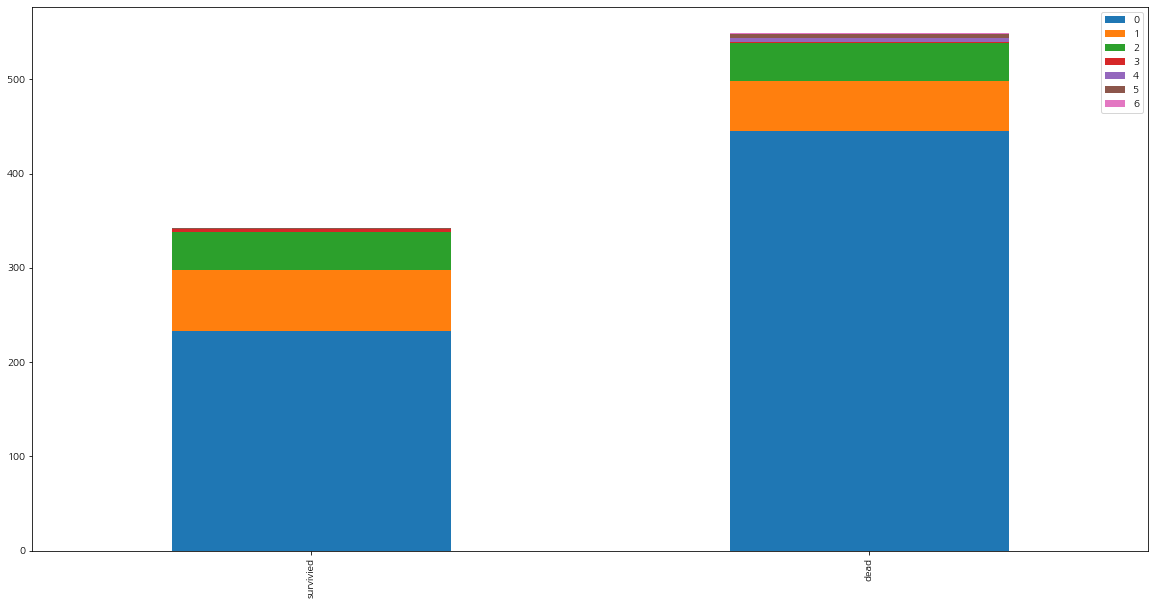

In [28]:
bar_chart('Parch')

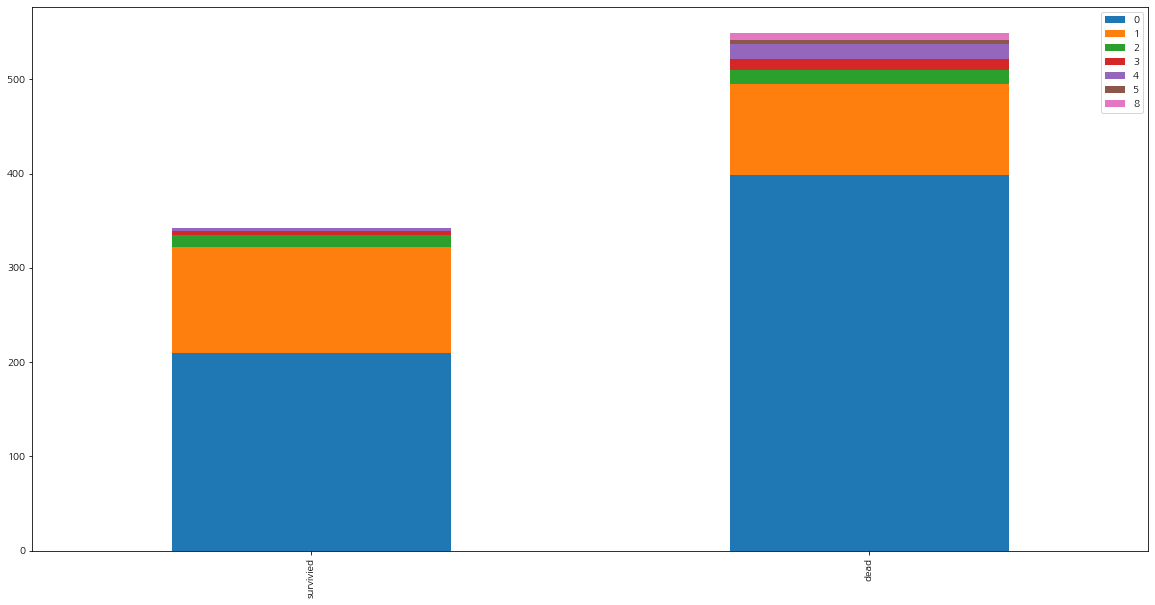

In [29]:
bar_chart('SibSp')

### 파악한 데이터의 특성
1. 칼럼은 총 12개가 있다. 
2. 칼럼은 승객번호, 생존여부, 객실 등급, 이름, 성별, 나이, 형제자매의 수, 부모자녀의 수, 티켓 번호, 운임료, 방번호, 탑승한 항구
3. 생존 유무에 영향을 미치는 칼럼들을 확인해보니 객실 등급, 성별, 나이, 형제자매 및 부모자녀의 수, 항구
4. 남/녀 중 여자가 더 살아남은 비율이 높다
5. 높은 등급의 승객일수록 살아남은 비율이 높다
6. 형제 자매, 부모 자녀가 적을수록 살아남은 비율이 높다
7. 항구 중에서 C항구인 사람이 많이 살아남았다

In [36]:
#정규 표현식 : 문자열 중에서 특정한 문자열만 골라내라 '([A-Za-z]+)\.'

In [48]:
train_data.Name.str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [49]:
#학습 데이터와 실험 데이터를 둘다 처리해야함
data = [train_data, test_data]
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [50]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Capt          1
Mme           1
Countess      1
Ms            1
Sir           1
Don           1
Lady          1
Name: Title, dtype: int64

In [51]:
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [52]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [53]:
pd.crosstab(test_data['Title'], test_data['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [55]:
#호칭을 단순화시키기
#혼인 유무 / 남녀 유무 / 직업이 호칭인 사람들은 전부 기타

for dataset in data:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Capt','Col', 'Countess','Don','Dona','Dr','Jonkheer','Lady','Major','Rev','Sir'],
                                                'etc')
    dataset['Title'] = dataset['Title'].astype(str)

In [56]:
pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
etc,3,20


In [57]:
pd.crosstab(test_data['Title'],test_data['Sex'])

Sex,female,male
Title,,
Master,0,21
Miss,79,0
Mr,0,240
Mrs,72,0
etc,1,5


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [61]:
#항구 데이터에서 없는 데이터의 갯수는 몇개인가?
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [62]:
train_data.Embarked.value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
#나이 데이터에서 없는 데이터의 갯수는 몇개인가? : 177개
train_data.Age.value_counts(dropna=False, sort=True)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [69]:
#age 칼럼의 빈 값을 채우기
for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(int(train_data['Age'].mean()))

In [70]:
dataset['Age'].value_counts()

29.0    96
24.0    17
21.0    17
22.0    16
30.0    15
        ..
7.0      1
60.5     1
26.5     1
76.0     1
34.5     1
Name: Age, Length: 79, dtype: int64

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
